In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.metrics import accuracy_score,r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error

c:\users\diana\appdata\local\programs\python\python36\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\diana\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\users\diana\appdata\local\programs\python\python36\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df = pd.read_csv('garments_worker_productivity.csv')

In [4]:
# See Quarter data
df["quarter"].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [6]:
# Convert Data to numeric
df["quarter"] = [int(x[-1]) for x in df["quarter"]]

In [7]:
# Convert date to datetime object
df["date"] = pd.to_datetime(df["date"])

In [8]:
df["day"].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [10]:
# Convert department and day of week to numeric
df["department"] = [x.strip() for x in df["department"]]
df["department"] = [0 if x == "sweing" else 1 for x in df["department"]]
day_to_num = {"Sunday" : 0, "Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6}
df["day"] = [day_to_num[x] for x in df["day"]]

In [12]:
from sklearn.impute import SimpleImputer
zero_imputer = SimpleImputer( strategy='constant', fill_value=0)
df["wip"] = pd.Series(zero_imputer.fit_transform(np.array(df["wip"]).reshape(1, -1)).reshape(-1))

In [13]:
df[["quarter", "department", "day", "team"]] = df[["quarter", "department", "day", "team"]].apply(lambda x: x.astype("category"))

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

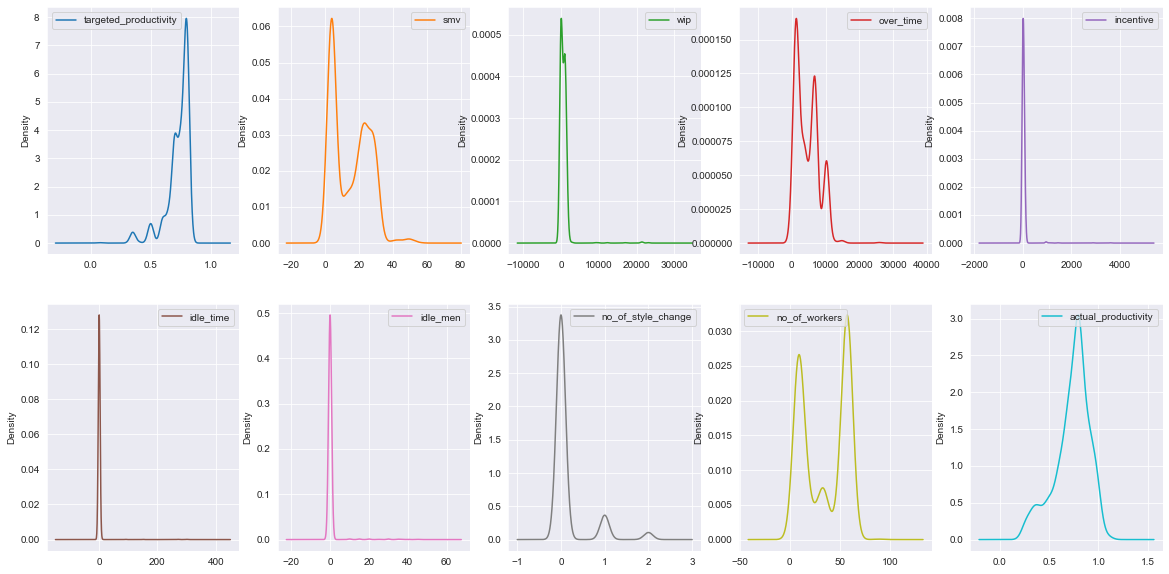

In [14]:
df.iloc[:, 1:].plot.density(subplots=True, layout=(2, 5), figsize=(20, 10), sharex = False)

<AxesSubplot:xlabel='date', ylabel='actual_productivity'>

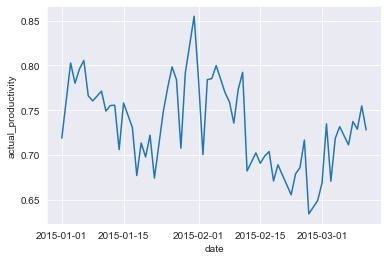

In [15]:
sns.lineplot(data = df, x = "date", y = "actual_productivity", ci = None)

<AxesSubplot:xlabel='actual_productivity', ylabel='Density'>

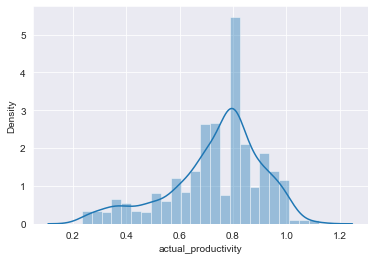

In [17]:
import seaborn as sns
sns.distplot(df.actual_productivity)